In [118]:
import os

import matplotlib
import matplotlib.pyplot as plt
import random
from typing import Tuple
import imageio.v3 as iio
import matplotlib.patches as patches

import numpy as np

In [12]:
def get_random_image(path: str) -> Tuple[str, str]:
    image_name = random.choice(os.listdir(os.path.join(path, 'images')))
    return os.path.join(path, 'images', image_name), os.path.join(path, 'labels', image_name.replace('jpg', 'txt'))

In [133]:
def get_box_cords(path_to_label: str) -> dict:
    defects = {}
    with open(path_to_label) as f:
        for line in f:
            line = line.split()
            if line == []:
                return {}
                
            if image is not None:
                if line[0] in defects:
                    defects[line[0]].append([float(i) for i in line[1:]])
                else:
                    defects[line[0]] = [[float(i) for i in line[1:]]]
    return defects

In [160]:
def show_defects(image: np.ndarray, defects: dict):
    fig, ax = plt.subplots(1, 2, figsize=(10, 15))
    ax[0].imshow(image)
    
    ax[1].imshow(image)
    y_shape, x_shape, _ = image.shape
    for label, cords in defects.items():
        for cord in cords:
            
            x_center = cord[0] * x_shape
            y_center = cord[1] * y_shape
            width = cord[2] * x_shape
            height = cord[3] * y_shape
            
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)

            rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
            ax[1].add_patch(rect)


In [167]:
path_to_data = r'../data/prepare_data'

image_path, label_path = get_random_image(path_to_data)
print(image_path)

../data/prepare_data/images/5 (212).jpg


{'0': [[0.428222, 0.080494, 0.019548, 0.043478], [0.386988, 0.896592, 0.026268, 0.042303], [0.393708, 0.82785, 0.016494, 0.045828], [0.627367, 0.368978, 0.019548, 0.058754], [0.869578, 0.108696, 0.022602, 0.118684]], '2': [[0.51741, 0.447709, 0.179597, 0.13161]]}


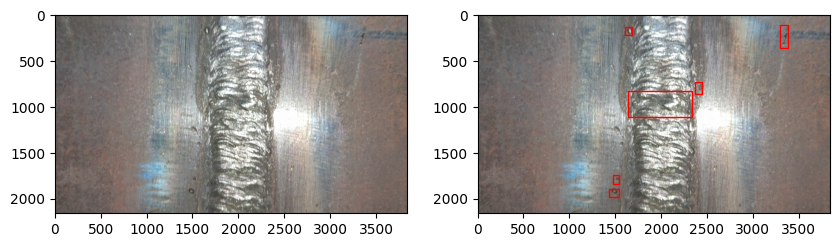

In [168]:
image = iio.imread(image_path)
defects = get_box_cords(label_path)
print(defects)

show_defects(image, defects)